In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [185]:
# download electoral data from IDESCAT site
# http://governacio.gencat.cat/ca/pgov_ambits_d_actuacio/pgov_eleccions/pgov_dades_electorals/

### INTRODUCTION

Regional elections in Catalonia on 27 September 2015  were not ordinary ones. They were a referendum in disguise. A referendum on the independence of Catalonia from the Spanish state. IDESCAT is the national institute of statistics of Catalonia.

#### IMPORT AND PROCESS ELECTORAL DATA

In [2]:
# import codes, pct votes, Candid
df_pct_vote_info = pd.read_csv('A20151_MU/FilesVots_A20151_MU_ca_ES.csv',sep =';',encoding='latin-1') 
# turn pct data from strings into integers ( first need to change comma into decimal point)
df_pct_vote_info["% vàlids"] = pd.to_numeric(df_pct_vote_info['% vàlids'].str.replace(",",".")) 
# make pivot table to rearrange info
df_pct_vote_info = df_pct_vote_info.pivot_table(index = ["Nom Municipi", "Codi Municipi", "Codi Província"], columns = "Candidatures", values = "% vàlids")
df_pct_vote_info = df_pct_vote_info.filter( regex = r"(Junt|Ciuta|Sociali|Partit Pop|es Pot|Unitat|Democr|Codi Mun)" )
# rename columns (change name Candidatures to make it simpler)
df_pct_vote_info.columns = ["CUP_pct","CSQP_pct","Cs_pct","JxSi_pct","PP_pct","PSC_pct","Unio_pct"]
# reset index
df_pct_vote_info = df_pct_vote_info.reset_index().set_index('Nom Municipi')
## Add columns
df_pct_vote_info['Unionisme_pct'] = df_pct_vote_info['Cs_pct'] + df_pct_vote_info['PSC_pct'] + df_pct_vote_info['PP_pct']
df_pct_vote_info['Independ_pct'] = df_pct_vote_info['JxSi_pct'] + df_pct_vote_info['CUP_pct']

#### IMPORT IDESCAT CODES

In [94]:
df_codes = pd.read_html('https://www.idescat.cat/codis/?id=50&n=9')[0]
df_codes.columns = ['Codi', 'Nom', 'Codi comarca', 'Nom comarca']
df_codes = df_codes.set_index('Nom')
df_codes.to_csv('Municip_codes_from_IDESCAT.csv')

#### EXAMPLES TO UNDERSTAND DF MERGE, JOIN

In [129]:
d1 = pd.DataFrame({'a':[1,2], 'b':[3,4]})
d2 = pd.DataFrame({'c':[11,22],'d':[33,44]})

In [130]:
d1.join(d2)

,a,b,c,d
0,1,3,11,33
1,2,4,22,44


In [152]:
dummy_1 = pd.DataFrame({'codis':['aa','bb','cc'], 'val1':[2,5,7]}).set_index('codis')
dummy_2 = pd.DataFrame({'codis':['aa','bb','dd'], 'val2':[21,52,74]}).set_index('codis')

In [155]:
dummy_2.join(dummy_1)

,val2,val1
codis,,
aa,21,2
bb,52,5
dd,74,NaN


In [156]:
dummy_1.join(dummy_2)

,val1,val2
codis,,
aa,2,21
bb,5,52
cc,7,NaN


In [163]:
pd.merge(dummy_1, dummy_2, left_index=True, right_index=True, how='outer')

,val1,val2
codis,,
aa,2,21
bb,5,52
cc,7,NaN
dd,NaN,74


In [212]:
df_codes.head()

,Nom,Codi,Codi comarca,Nom comarca
0,Abella de la Conca,250019,25,Pallars Jussà
1,Abrera,80018,11,Baix Llobregat
2,Agramunt,250030,38,Urgell
3,Aguilar de Segarra,80023,7,Bages
4,Agullana,170010,2,Alt Empordà


In [209]:
pd.merge(df_pct_vote_info, df_codes, left_index=True, right_index=True, how='outer')

,Codi Municipi,Codi Província,CUP_pct,CSQP_pct,Cs_pct,JxSi_pct,PP_pct,PSC_pct,Unio_pct,Unionisme_pct,Independ_pct,Nom,Codi,Codi comarca,Nom comarca
Abella de la Conca,25001,25,16.82,2.80,8.41,53.27,4.67,10.28,2.80,23.36,70.09,NaN,NaN,NaN,NaN
Abrera,8001,8,6.43,13.31,25.14,23.92,8.79,18.10,1.86,52.03,30.35,NaN,NaN,NaN,NaN
Agramunt,25003,25,5.21,3.56,8.64,66.48,6.34,5.52,2.98,20.50,71.69,NaN,NaN,NaN,NaN
Aguilar de Segarra,8002,8,10.98,3.05,2.44,73.78,2.44,0.00,6.10,4.88,84.76,NaN,NaN,NaN,NaN
Agullana,17001,17,16.77,3.35,6.50,62.47,3.14,5.45,1.89,15.09,79.24,NaN,NaN,NaN,NaN
Aiguafreda,8014,8,9.74,5.08,5.02,64.18,5.14,6.61,3.31,16.77,73.92,NaN,NaN,NaN,NaN
Aiguamúrcia,43001,43,10.40,5.84,12.04,54.56,5.66,9.12,0.91,26.82,64.96,NaN,NaN,NaN,NaN
Aiguaviva,17002,17,8.62,3.21,9.42,68.34,3.01,3.01,3.81,15.44,76.96,NaN,NaN,NaN,NaN
Aitona,25038,25,3.86,1.80,5.00,65.14,14.52,4.76,4.18,24.28,69.00,NaN,NaN,NaN,NaN
"Alamús, els",25004,25,4.39,3.97,8.16,68.83,4.81,4.81,4.18,17.78,73.22,NaN,NaN,NaN,NaN


In [96]:
# url = 'http://www.idescat.cat/emex/?id=080327'
# id_scrap = requests.get(url, headers=headers)
# soup = BeautifulSoup(id_scrap.text, "lxml")
# table = soup.findAll("table", id ='t90')
# xx = pd.read_html(str(table), thousands='.')[0]

#### DATA SCRAPING FROM IDESCAT

In [4]:
import requests
from bs4 import BeautifulSoup
import json

In [97]:
headers = {'User-Agent':
           "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/601.4.4 (KHTML, like Gecko) Version/9.0.3 Safari/601.4.4"}

list_ids = ['t68','t56','t84','t90','t5']
labels = ['Pop_struct', 'Unemployment', 'Educ_level', "Català", 'Income_level']

df_codes = pd.read_csv('Municip_codes_from_IDESCAT.csv')
codes, names = df_codes['Codi'].astype(str).str.zfill(6).values, df_codes['Nom'].values

all_munic_info = defaultdict(dict)

for code, name in zip(codes, names):
    print(name)
    url = 'http://www.idescat.cat/emex/?id=' + code
    req_resp = requests.get(url, headers=headers)
    soup = BeautifulSoup(req_resp.text, "lxml")
    for idx, label in zip(list_ids, labels):
        try:
            table = soup.findAll("table", id =idx)
            values = pd.read_html(str(table), thousands='.')[0][name].str.replace(",", ".").values[:-1]
            all_munic_info[name][label] = [float(x) if '.' in x 
                                           else None if ':' in x  
                                           else int(x) 
                                           for x in values]
        except:
            all_munic_info[name][label] = []
#save data            
with open('ALL_MUNICIPAL_DATA.json', 'w') as f:
    json.dump(all_munic_info, f)         

In [5]:
with open('ALL_MUNICIPAL_DATA.json') as data_file:    
    data = json.load(data_file)

#### Make dataframes from json data

In [6]:
pop_stats, income_stats, ed_level_stats, cat_stats = [], [], [], []
names_municips = []
for idx, (key, val) in enumerate(data.items()):
    pop_stats.append(val['Pop_struct'])
    income_stats.append(val['Income_level'])
    ed_level_stats.append(val['Educ_level'])
    cat_stats.append(val['Català'])
    names_municips.append(key)
pop_stats = pd.DataFrame(pop_stats, columns =['Cat', 'Spa', 'Abroad', 'Tot'])
income_stats = pd.DataFrame(income_stats, columns = ['RFDB', 'RFDB_hab', 'RFDB_idx'])
ed_level_stats = pd.DataFrame(ed_level_stats, columns =['ST', '1erGrau', '2nGrau','Univ','Tot_Niv_Ed'])
cat_stats = pd.DataFrame(cat_stats, columns = ['understands', 'speaks', 'reads', 'writes', 'no_underst', 'Tot_cat'])
names_municips = pd.DataFrame(names_municips, columns=['Municipi'])

In [7]:
# add new columns to data dfs
pop_stats['pct_foreign'] = 100 * pop_stats['Abroad'] / pop_stats['Tot']
pop_stats['pct_spa'] = 100 * pop_stats['Spa'] / pop_stats['Tot']
ed_level_stats['pct_Univ'] = 100 * ed_level_stats['Univ']/ed_level_stats['Tot_Niv_Ed']
cat_stats['pct_cat_speakers'] = 100 * cat_stats['speaks'] / cat_stats['Tot_cat']

all_stats = pop_stats.join(income_stats).join(ed_level_stats).join(cat_stats).join(names_municips)
all_stats = all_stats.set_index('Municipi')

# all_stats = pd.merge(pop_stats, ed_level_stats)
# all_stats = pd.merge(all_stats, cat_stats).set_index('Municipi')

In [158]:
DF_ALL_MUNIC_DATA = df_pct_vote_info.join(all_stats)

In [164]:
DF_ALL_MUNIC_DATA.to_csv('DF_ALL_MUNIC_DATA.csv')

In [10]:
DF_ALL_MUNIC_DATA = pd.read_csv('DF_ALL_MUNIC_DATA.csv')

#### PLOTTING

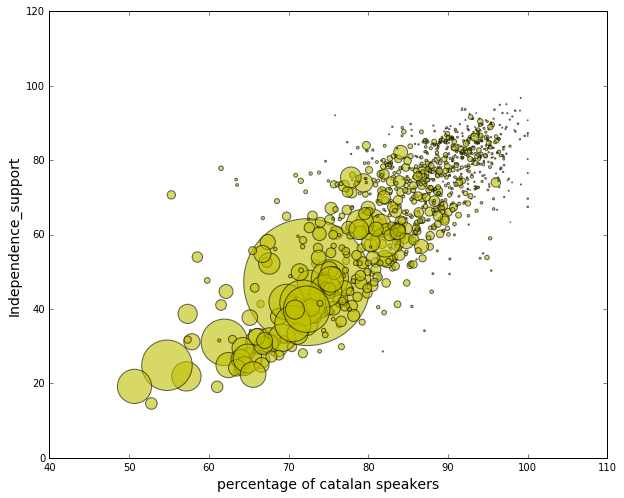

In [50]:
#plt.scatter(DF_ALL_MUNIC_DATA['pct_cat_speakers'], DF_ALL_MUNIC_DATA['Unionisme_pct'], s= DF_ALL_MUNIC_DATA['Tot']/100)
plt.scatter(DF_ALL_MUNIC_DATA['pct_cat_speakers'], DF_ALL_MUNIC_DATA['Independ_pct'],
            edgecolors='black',
            s= DF_ALL_MUNIC_DATA['Tot']/100, 
            color='y',
            alpha=0.6)
plt.xlabel('percentage of catalan speakers', fontsize=14)
plt.ylabel('Independence_support', fontsize=14)

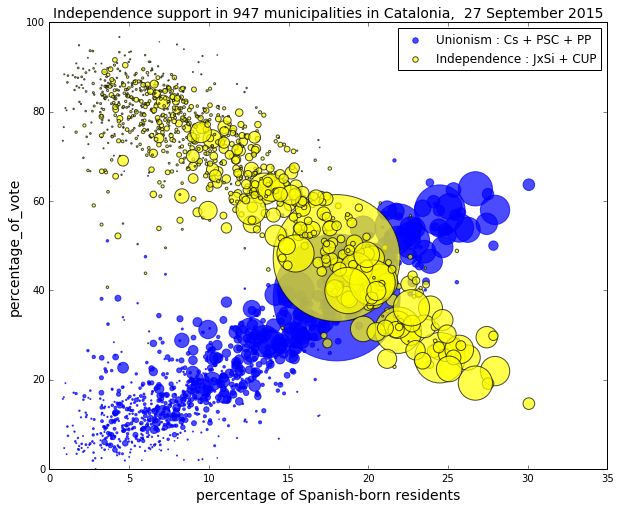

In [55]:
plt.rcParams["figure.figsize"] = (10, 8)

plt.scatter(DF_ALL_MUNIC_DATA['pct_spa'], DF_ALL_MUNIC_DATA['Unionisme_pct'],
            label = 'Unionism : Cs + PSC + PP',
            color='blue', alpha=0.7, s= DF_ALL_MUNIC_DATA['Tot']/100)
plt.scatter(DF_ALL_MUNIC_DATA['pct_spa'], DF_ALL_MUNIC_DATA['Independ_pct'],
            label= "Independence : JxSi + CUP",
            facecolor='yellow', alpha=0.7, s= DF_ALL_MUNIC_DATA['Tot']/100)
plt.xlim(0, 35)
plt.ylim(0, 100)
plt.xlabel('percentage of Spanish-born residents', fontsize=14)
plt.ylabel('percentage_of_vote', fontsize=14)
plt.title('Independence support in 947 municipalities in Catalonia,  27 September 2015', {'fontsize': 14.})
lgnd = plt.legend(loc ='best', scatterpoints=1, fontsize=12)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig('pct_vote_vs_pct_Spanish_born_residents')

In [145]:
plt.scatter(DF_ALL_MUNIC_DATA['pct_cat_speakers'], DF_ALL_MUNIC_DATA['pct_spa'] + DF_ALL_MUNIC_DATA['pct_foreign'])

In [161]:
plt.scatter( DF_ALL_MUNIC_DATA['RFDB_idx'], DF_ALL_MUNIC_DATA['Independ_pct'], s= DF_ALL_MUNIC_DATA['Tot']/100, alpha=0.7)

### STATSMODEL

\begin{align}
Regression
\newline
Y &= \alpha X + \beta 
\newline
\end{align}

In [ ]:
####STATSMODELS REGRESSION ####################
## before symbolic regression get rid of blank spaces in column names
DF_ALL_MUNIC_DATA.columns = DF_ALL_MUNIC_DATA.columns.str.replace(" ","_")
#import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Fit regression model()

results = smf.ols("Independ_pct ~ pct_cat_speakers", data = DF_ALL_MUNIC_DATA).fit()
## Inspect the results
print ( results.summary())
results = smf.ols("Independ_pct ~ pct_spa + RFDB_idx + pct_Univ + pct_cat_speakers", data = DF_ALL_MUNIC_DATA).fit()
## Inspect the results
print ( results.summary())

### MAPS

In [151]:
## IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona ## to read shapefiles
from itertools import chain
import pysal.esda.mapclassify as mapclassify
import shapefile

In [182]:
my_shp = fiona.open('CAT_municipis_shp/municipis.shp')

In [179]:
class mapviz():
    """ Input data, map file and column to be visualized"""

    def __init__(self, datafile, shapefile, var_to_plot):
        self.datafile = datafile
        self.shapefile = shapefile
        self.var_to_plot = var_to_plot
        self.load_data()
        self.load_geo_limits()
        self.apply_basemap()
        self.set_up_DF()
        self.plot()

############ IMPORT DATASET

## read in electoral data

    def load_data(self):
        data = pd.read_csv(self.datafile, encoding='latin-1')
        self.data = data.rename(columns = {"Codi Municipi":"Codi_Municipi"})



########## LOAD SHAPEFILE using FIONA ( the pythonic way)
# SHAPEFILE and FIONA are modules to read in shapefiles content
# SHAPELY is a module to manipulate shapefiles
# Shapefile should end in .shp

    def load_geo_limits(self):
        shp = fiona.open(self.shapefile)

## fiona.open gives a fiona collection, and each element of the collection
## is a dict with keys ['id', 'geometry', 'properties', 'type']
## so it's easy to explore it all

#we can access the boundaries (the 2 lat,long pairs) using shp.bounds
        self.bds = shp.bounds

#close the shp file
        shp.close()

#define a variable called extra which we will use for padding the map when we display it (in this case I've selected a 10% pad)
        self.extra = 0.1

#define the lower left hand boundary (longitude, latitude)
        ll = (self.bds[0], self.bds[1])

#define the upper right hand boundary (longitude, latitude)
        ur = (self.bds[2], self.bds[3])

#concatenate the lower left and upper right into a variable called coordinates
        self.coords = list(chain(ll, ur))

#define variables for the width and the height of the map
        self.w, self.h = self.coords[2] - self.coords[0], self.coords[3] - self.coords[1]

###PLOT WITH BASEMAP ##################
####CREATE BASEMAP

    def apply_basemap(self):
        m = Basemap(
            #set projection to 'tmerc' which is apparently less distorting when close-in
            projection='tmerc',

            #set longitude as average of lower, upper longitude bounds
            lon_0 = np.average([self.bds[0],self.bds[2]]),

            #set latitude as average of lower,upper latitude bounds
            lat_0 = np.average([self.bds[1],self.bds[3]]),

            #string describing ellipsoid (‘GRS80’ or ‘WGS84’, for example). Not sure what this does...
            ellps = 'WGS84',
            
            #set the map boundaries. Note that we use the extra variable to provide a 10% buffer around the map
            llcrnrlon=self.coords[0] - self.extra * self.w,
            llcrnrlat=self.coords[1] - self.extra + 0.01 * self.h,
            urcrnrlon=self.coords[2] + self.extra * self.w,
            urcrnrlat=self.coords[3] + self.extra + 0.01 * self.h,

            #provide latitude of 'true scale.' Not sure what this means, I would check the Basemap API if you are a GIS guru
            lat_ts=0,

            #resolution of boundary database to use. Can be c (crude), l (low), i (intermediate), h (high), f (full) or None.
            resolution='i',
            
            #don't show the axis ticks automatically
            suppress_ticks=True)

        m.readshapefile(
            #provide the path to the shapefile, but leave off the .shp extension
            'CAT_municipis_shp/municipis',

            #name your map something useful (I named this 'srilanka')
            'municipis',

            #set the zorder (layer order).Black is default color
            zorder=2,
            
            #set encoding to read Catalan names
            default_encoding = 'latin-1')

        self.m = m



### SETTING UP DATAFRAME ######### ALTERNAT : use GEOPANDAS
# set up a map dataframe

    def set_up_DF(self):
        df_map = pd.DataFrame({

            #access the x,y coords and define a polygon for each item in m.municipis
            # This uses Basemap code that already projects long,lat coords
            'poly': [Polygon(xy) for xy in self.m.municipis],
            #conver NAME_1 to a column called 'district'
            "Codi_Municipi": [district['Codigo'] for district in self.m.municipis_info],
            'nom': [district['Texto'] for district in self.m.municipis_info]})

        df_map["Codi_Municipi"] = pd.to_numeric(df_map["Codi_Municipi"])

        ### MERGE ##########
        self.df_map = pd.merge(df_map, self.data, on="Codi_Municipi")





####PLOT #####

#############
    def plot(self):

        # define the figure and set the facecolor (e.g. background) to white
        fig = plt.figure(facecolor='white')

        # ad a subplot called 'ax'
        ax = fig.add_subplot(111, axisbg='w', frame_on=False)

        # use a blue colour ramp ('Blues') - we'll be converting it to a map using cmap()
        # you could also use 'Oranges' or 'Greens' 
        cmap = plt.get_cmap('YlOrRd')

        # Use descartes to create shapely patches from Nx2 arrays of points
        # Use pandas map to apply to entire column
        # draw district with grey outlines
        self.df_map['patches'] = self.df_map['poly'].map(lambda x: PolygonPatch(x, ec='#555555', lw=.2, alpha=1., zorder=4))


        # set the PatchCollection with our defined 'patches'
        pc = PatchCollection(self.df_map['patches'], match_original=True)
        ax.add_collection(pc)
        ax.plot()

        # normalize our bins between the min and max values within the bins
        norm = Normalize(vmin=0., vmax= 100.)

        # impose our color map onto the patch collection
        
        pc.set_facecolor(cmap(norm(self.df_map[self.var_to_plot].values)))

        ##since patches are not mapped, use proxy mappable object
        mappable = cm.ScalarMappable(cmap=cmap)
        mappable.set_array(self.df_map[self.var_to_plot].values)
        colorbar = plt.colorbar(mappable)
        plt.show()




In [180]:
my_class = mapviz("DF_ALL_MUNIC_DATA.csv","CAT_municipis_shp/municipis.shp", "Unionisme_pct")

In [195]:
len(my_class.df_map['poly'])

1114

In [200]:
aa=my_class.set_up_DF()

In [202]:
len(my_class.df_map)

1114